In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Sequentialfeatureselection import backward_fs, forward_fs
plt.style.use('ggplot')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('fraud_oracle.csv')

In [3]:
df.shape

(15420, 33)

In [4]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [6]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


so we have 15420 data , 32 features and 1 target FraudFound_P

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [8]:
print('DayOfWeekClaimed',df['DayOfWeekClaimed'].unique())
print('MonthClaimed',df['MonthClaimed'].unique())

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']


In [3]:
df = df.loc[df['DayOfWeekClaimed']!='0']
df = df.loc[df['MonthClaimed']!='0']

In [10]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

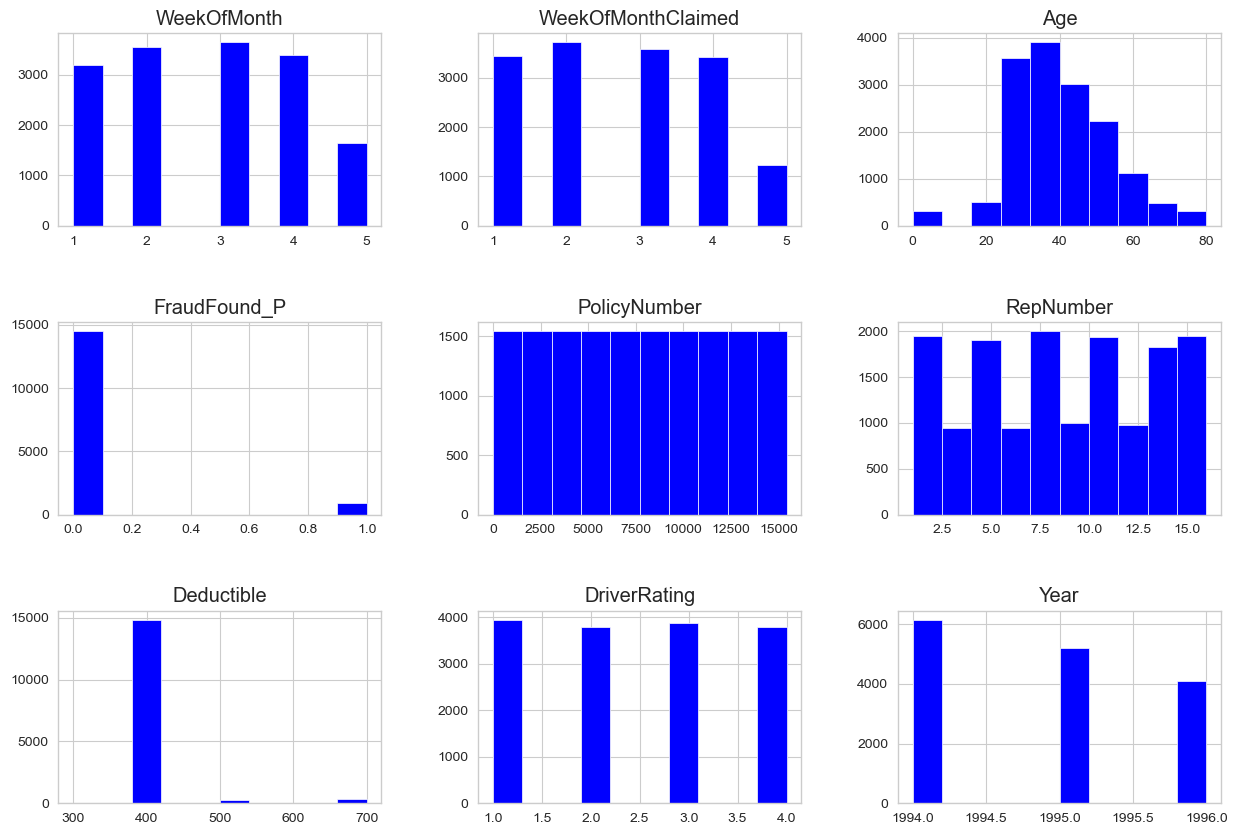

In [11]:
df.hist(figsize=(15,10), color = 'blue')
plt.subplots_adjust(hspace=0.5);

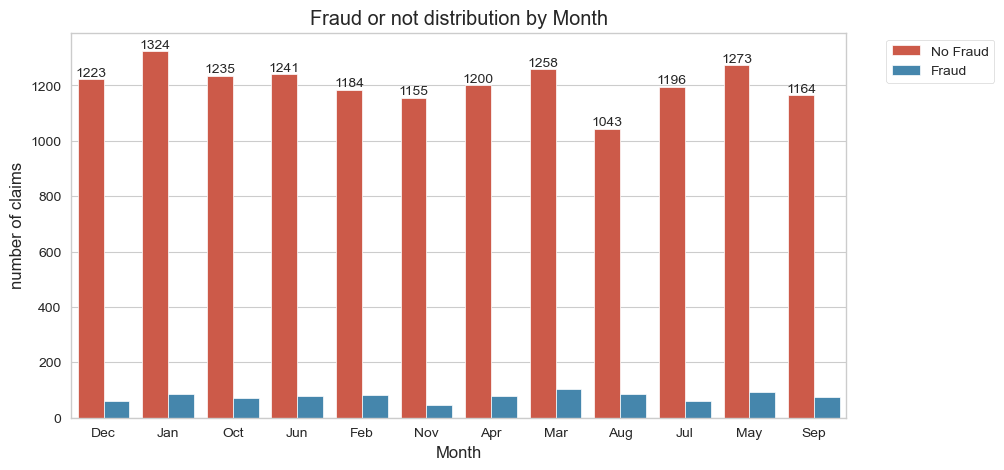

In [12]:
plt.figure(figsize=(10, 5))
labels = ['No Fraud', 'Fraud']
fig = sns.countplot(x="Month", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by Month')

plt.ylabel('number of claims')
plt.show()

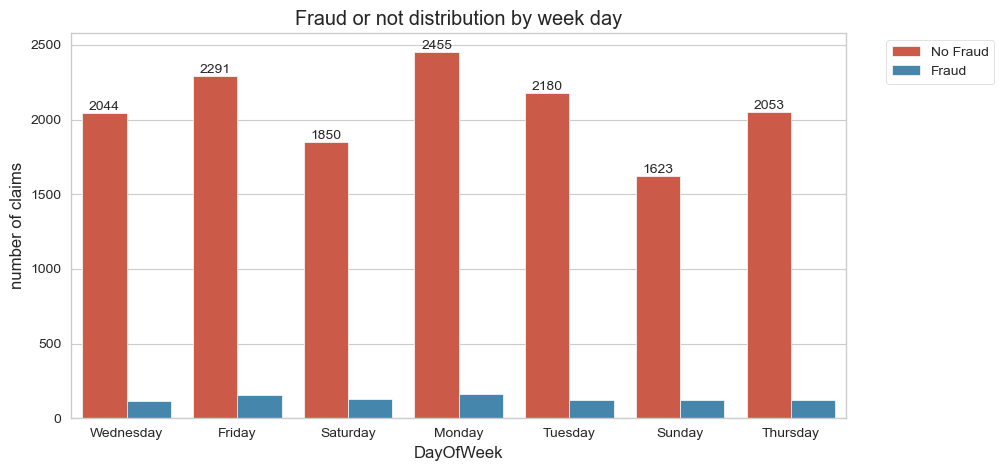

In [13]:
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="DayOfWeek", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by week day')

plt.ylabel('number of claims')
plt.show()

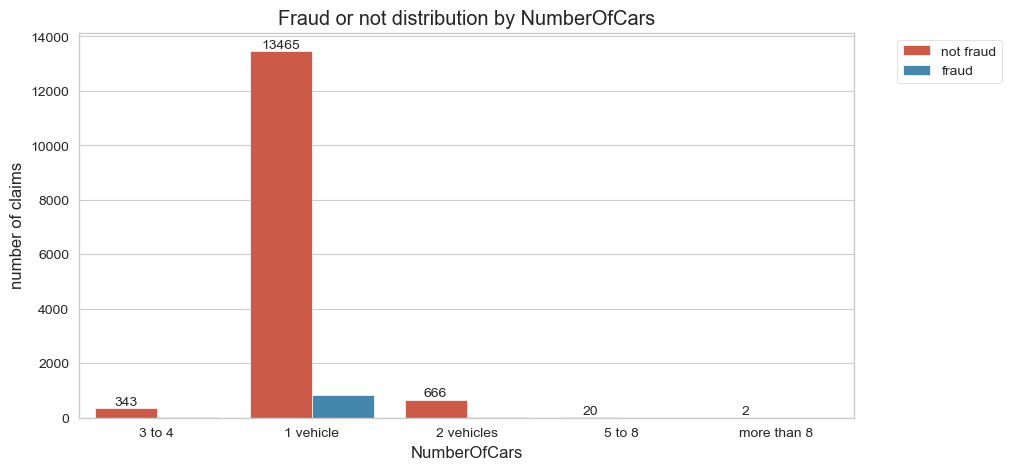

In [14]:
df.groupby(['NumberOfCars','FraudFound_P']).size().reset_index().rename(columns={0:'Num of claims'})
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="NumberOfCars", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(['not fraud', 'fraud'], bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by NumberOfCars')

plt.ylabel('number of claims')
plt.show()

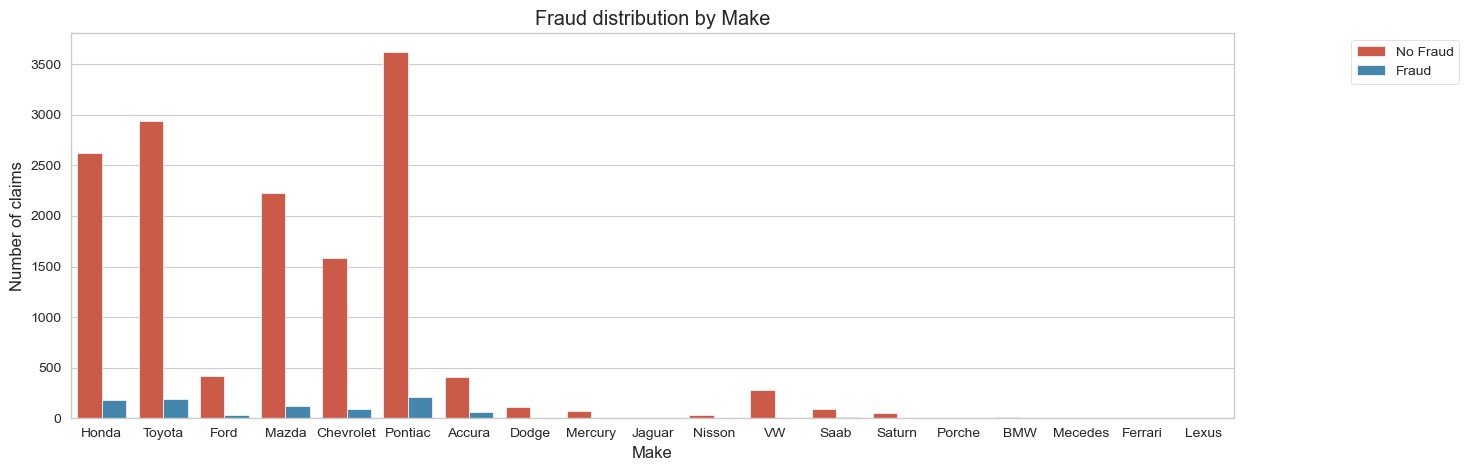

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.title('Fraud distribution by Make')
plt.xlabel('Make')
plt.ylabel('Number of claims')
plt.show()

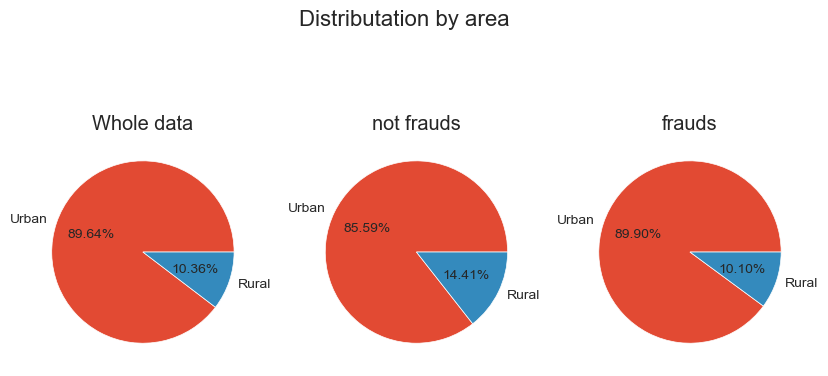

In [16]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
Accident_area_1 = df.AccidentArea.value_counts().values
Accident_area_2 = df_fraud1.AccidentArea.value_counts().values
Accident_area_3 = df_no_fraud.AccidentArea.value_counts().values
labels = ['Urban','Rural']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].pie(Accident_area_1, labels = labels, autopct = '%1.2f%%')
ax[0].set_title('Whole data')

ax[1].pie(Accident_area_2, labels = labels, autopct = '%1.2f%%')
ax[1].set_title('not frauds')

ax[2].pie(Accident_area_3, labels = labels, autopct = '%1.2f%%')
ax[2].set_title('frauds')

fig.suptitle('Distributation by area', fontsize=16)
plt.show()


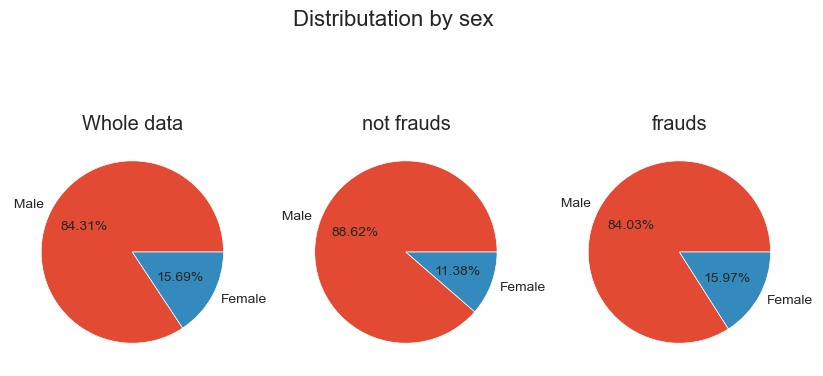

In [17]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
area_1 = df.Sex.value_counts().values
area_2 = df_fraud1.Sex.value_counts().values
area_3 = df_no_fraud.Sex.value_counts().values
labels = [' Male','Female']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].pie(area_1, labels = labels, autopct = '%1.2f%%')
ax[0].set_title('Whole data')

ax[1].pie(area_2, labels = labels, autopct = '%1.2f%%')
ax[1].set_title('not frauds')

ax[2].pie(area_3, labels = labels, autopct = '%1.2f%%')
ax[2].set_title('frauds')

fig.suptitle('Distributation by sex', fontsize=16)
plt.show()


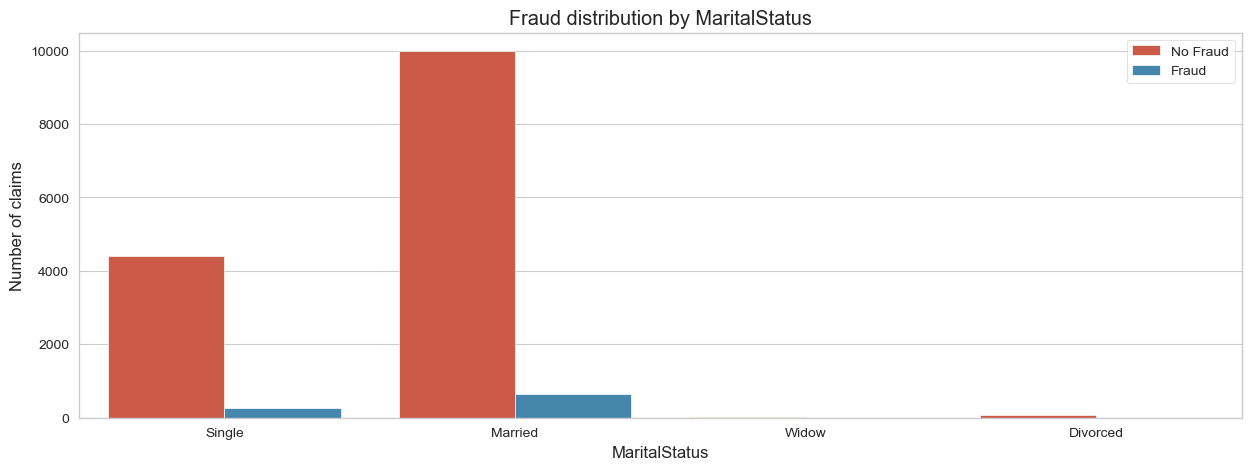

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(x="MaritalStatus" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Number of claims')
plt.show()

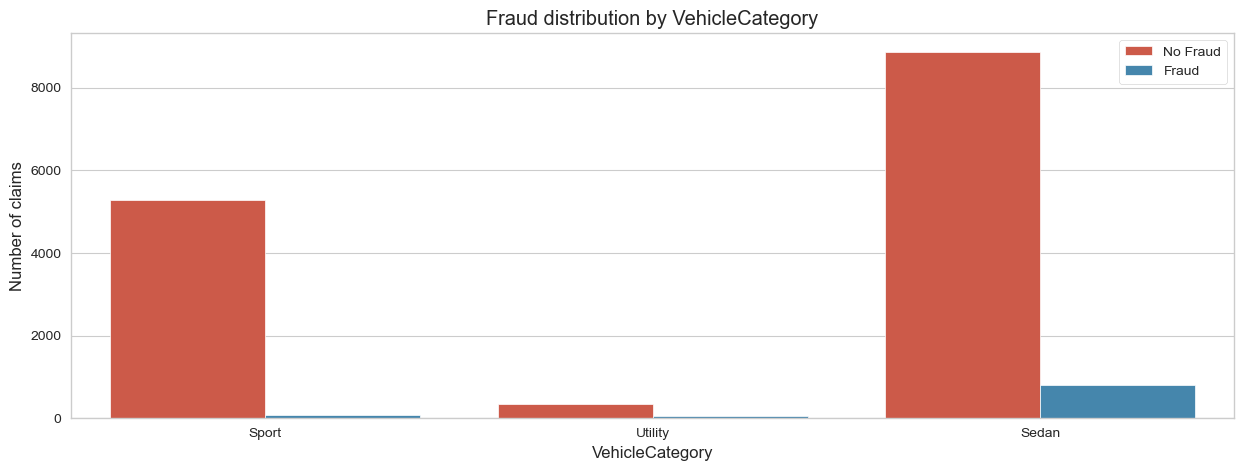

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(x="VehicleCategory" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by VehicleCategory')
plt.xlabel('VehicleCategory')
plt.ylabel('Number of claims')
plt.show()

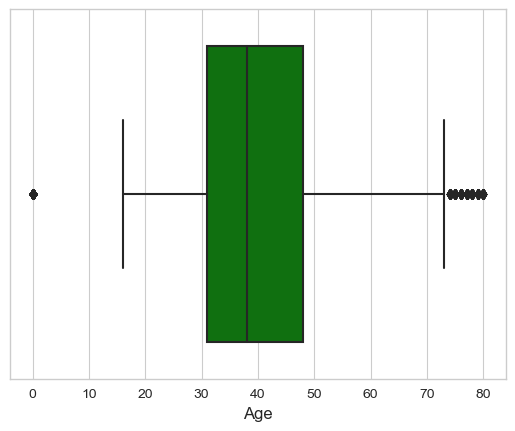

In [20]:
sns.boxplot(x = 'Age', data = df, color = 'green')
plt.show()

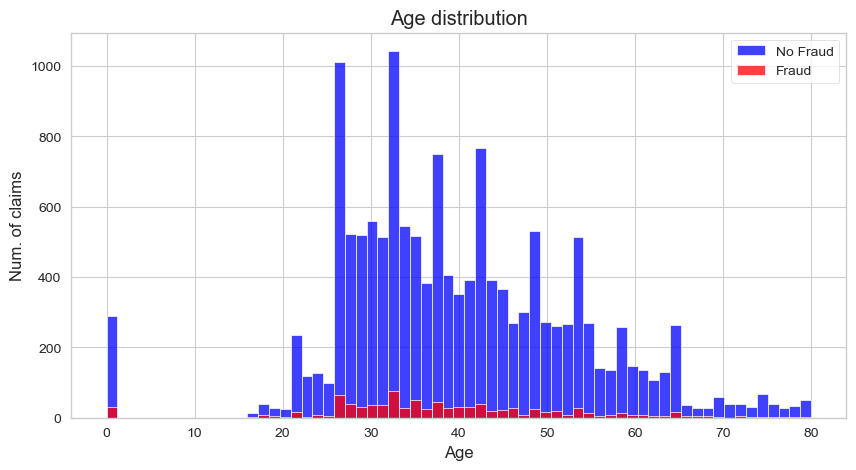

In [21]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
plt.figure(figsize=(10,5))
sns.histplot(data = df_no_fraud, x = 'Age', color = 'blue', bins = 65)
sns.histplot(data = df_fraud1, x = 'Age', color = 'red', bins = 65)
plt.title('Age distribution')
plt.legend(["No Fraud", "Fraud"])
plt.ylabel("Num. of claims")
plt.show()

In [4]:
df = df[df['Age']>15]

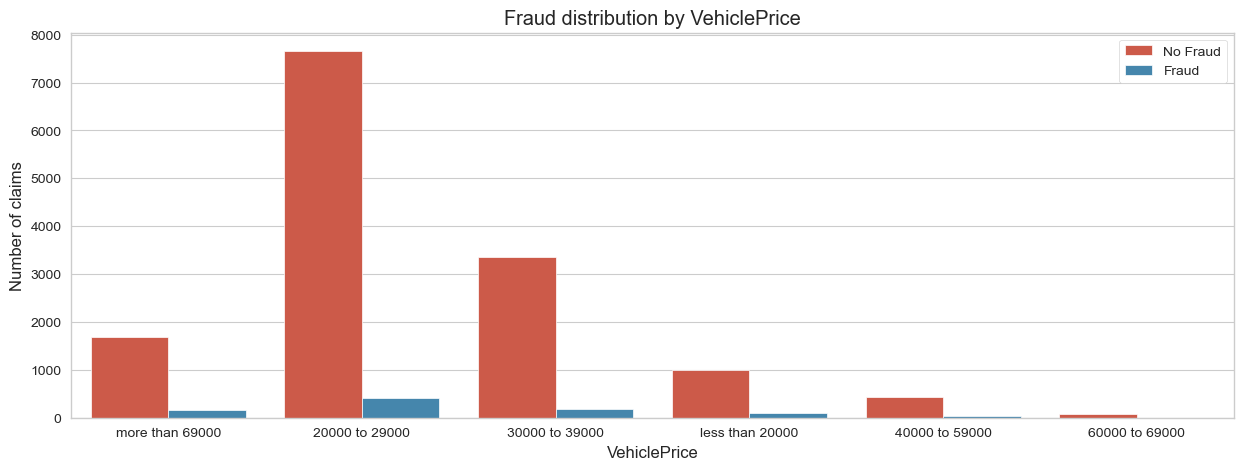

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(x="VehiclePrice" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by VehiclePrice')
plt.xlabel('VehiclePrice')
plt.ylabel('Number of claims')
plt.show()

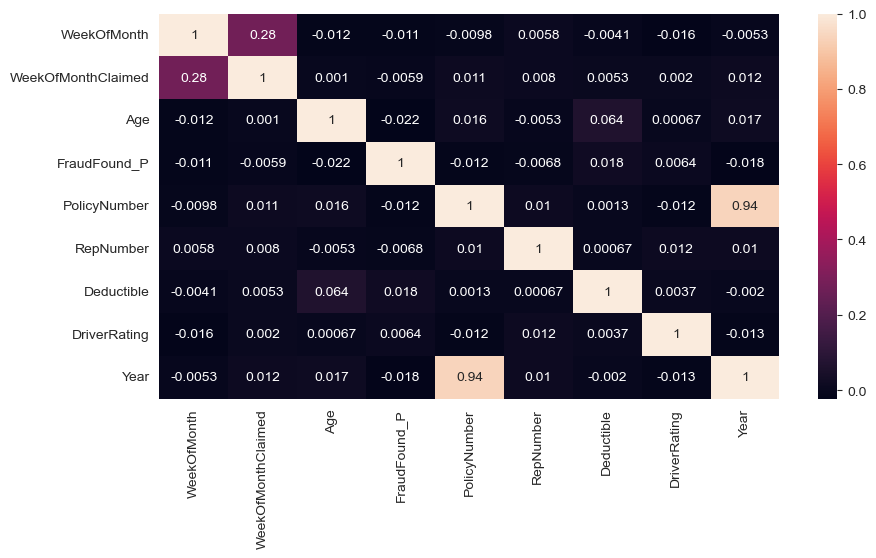

In [24]:
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.show()

# Encoding Data

In [5]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')


now we have to encode these columns to get numeric values

In [6]:
# month encoding
df[['Month']] = df[['Month']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })

In [7]:
# day of week encoding
df[['DayOfWeek']] = df[['DayOfWeek']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })

In [8]:
# Make encoding
df[['Make']] = df[['Make']].replace( {
    'Lexus': 0,
    'Ferrari': 1, 
    'Mecedes': 2,
    'Porche': 3,
    'Jaguar': 4,
    'BMW': 5,            
    'Nisson': 6,
    'Saturn': 7,
    'Mercury':8,
    'Dodge' : 9,
    'Saab' : 10,
    'VW' : 11,
    'Ford': 12,
    'Accura': 13,
    'Chevrolet': 14,
    'Mazda' : 15,
    'Honda' : 16,
    'Toyota' : 17,
    'Pontiac': 18
    })  

In [9]:
# accident area encoding
df[['AccidentArea']] = df[['AccidentArea']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })

In [10]:
# DayOfWeekClaimed encoding
df[['DayOfWeekClaimed']] = df[['DayOfWeekClaimed']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })

In [11]:
# MonthClaimed encoding
df[['MonthClaimed']] = df[['MonthClaimed']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


In [12]:
# sex encoding
df[['Sex']] = df[['Sex']].replace( {
    'Female' : 0,
    'Male' : 1
    })

In [13]:
# marital status encoding
df[['MaritalStatus']] = df[['MaritalStatus']].replace( {
    'Widow' : 0,
    'Divorced' : 1,
    'Single' : 2,    
    'Married' : 3
    })

In [14]:
# Fault encoding
df[['Fault']] = df[['Fault']].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })

In [15]:
# policy type encoding
df[['PolicyType']] = df[['PolicyType']].replace( {
    'Sport - Liability' : 0,
    'Sport - All Perils' : 1,
    'Utility - Liability' : 2,
    'Utility - Collision' :3,
    'Utility - All Perils' :4,
    'Sport - Collision' : 5,
    'Sedan - All Perils' : 6 ,
    'Sedan - Liability' : 7,
    'Sedan - Collision' : 8
    })


In [16]:
# vehicle category encoding
df[['VehicleCategory']] = df[['VehicleCategory']].replace( {
    'Utility' : 0,
    'Sport' : 1, 
    'Sedan' : 2
    })

In [17]:
# vehicle price encoding
df[['VehiclePrice']] = df[['VehiclePrice']].replace( {
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5
    })  

In [18]:
# Days_Policy_Accident encoding
df[['Days_Policy_Accident']] = df[['Days_Policy_Accident']].replace( {
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4
    })

In [19]:
# Days_Policy_claim encoding
df[['Days_Policy_Claim']] = df[['Days_Policy_Claim']].replace( {
    '8 to 15' : 0,
    '15 to 30' : 1,
    'more than 30' : 2
    })

In [20]:
# PastNumberOfClaims encoding
df[['PastNumberOfClaims']] = df[['PastNumberOfClaims']].replace( {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
    })

In [21]:
# age of vehicle encoding
df[['AgeOfVehicle']] = df[['AgeOfVehicle']].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4, 
    '6 years' : 5,
    '7 years' : 6,      
    'more than 7' : 7
    })

In [22]:
# age of policy holder encoding
df[['AgeOfPolicyHolder']] = df[['AgeOfPolicyHolder']].replace({
    '18 to 20' : 0,  
    '21 to 25' : 1,
    '26 to 30' : 2,
    '31 to 35' : 3,
    '36 to 40' : 4,
    '41 to 50' : 5,
    '51 to 65' : 6, 
    'over 65' : 7
    })

In [23]:
# PoliceReportFiled encoding
df[['PoliceReportFiled']] = df[['PoliceReportFiled']].replace({
    'Yes' : 0,
    'No' : 1
    })

In [24]:
# witness present encoding
df[['WitnessPresent']] = df[['WitnessPresent']].replace({
    'Yes' : 0,
    'No' : 1
    })

In [25]:
# agent type encoding
df[['AgentType']] = df[['AgentType']].replace({
    'Internal' : 0,
    'External' : 1
    })

In [26]:
# NumberOfSuppliments encoding
df[['NumberOfSuppliments']] = df[['NumberOfSuppliments']].replace({
    'none' : 0,
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3
    })

In [27]:
# AddressChange_Claim encoding
df[['AddressChange_Claim']] = df[['AddressChange_Claim']].replace({
    'no change' : 0,
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3,
    '4 to 8 years' : 4
    })

In [28]:
# number of cars encoding
df[['NumberOfCars']] = df[['NumberOfCars']].replace({
    '1 vehicle' : 0,
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3,
    'more than 8' : 4
    })

In [29]:
# base policy encoding
df[['BasePolicy']] = df[['BasePolicy']].replace({
    'All Perils' : 0, 
    'Liability' : 1,
    'Collision' : 2 
    })

In [50]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,11,5,2,16,1,1,0,1,0,2,21,1,0,1,5,0,1,12,300,1,4,2,0,2,2,1,1,1,0,2,2,1994,1
1,0,3,2,16,1,0,0,4,1,2,34,1,5,1,5,0,2,15,400,4,4,2,0,5,3,0,1,1,0,0,0,1994,2
2,9,5,4,16,1,3,10,2,1,3,47,1,5,1,5,0,3,7,400,3,4,2,1,6,5,1,1,1,0,0,0,1994,2
3,5,2,5,17,0,4,6,1,1,3,65,0,7,1,1,0,4,4,400,2,4,2,1,7,6,0,1,1,3,0,0,1994,1
4,0,5,0,16,1,1,1,2,0,2,27,0,5,1,5,0,5,3,400,1,4,2,0,4,3,1,1,1,0,0,0,1994,2


# Data imbalance ckeck

In [51]:
df['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

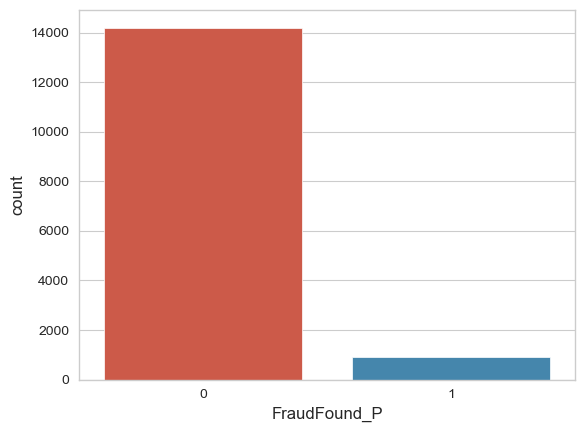

In [52]:
sns.countplot(x='FraudFound_P', data=df)
plt.show()

so the data is imbalance and we need to use some balancing tecniques

In [36]:
from sklearn.model_selection import train_test_split

y = df['FraudFound_P']
X = df.drop('FraudFound_P', axis=1)

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8094651653764954


c:\Users\Rina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

# train the model on the training set
svm.fit(X_train, y_train)

# make predictions on the testing set
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

# train the model on the training set
tree.fit(X_train, y_train)

# make predictions on the testing set
y_pred = tree.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9178807947019868


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training set
rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9407284768211921


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# train the model on the training set
knn.fit(X_train, y_train)

# make predictions on the testing set
y_pred = knn.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9374172185430464


c:\Users\Rina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
nb = GaussianNB()

# train the model on the training set
nb.fit(X_train, y_train)

# make predictions on the testing set
y_pred = nb.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7684729064039408
